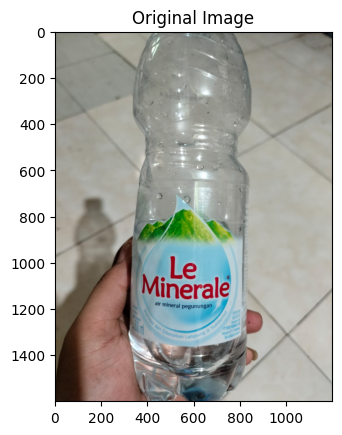

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Muat gambar
image_path = 'botol.jpeg'
image = cv2.imread(image_path)

# Periksa apakah gambar berhasil dimuat
if image is None:
    raise ValueError(f"Image not found at the path: {image_path}")

# Konversi gambar ke RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli
plt.imshow(image)
plt.title('Original Image')
plt.show()

# Ubah bentuk gambar menjadi vektor fitur (n_samples, n_features)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)


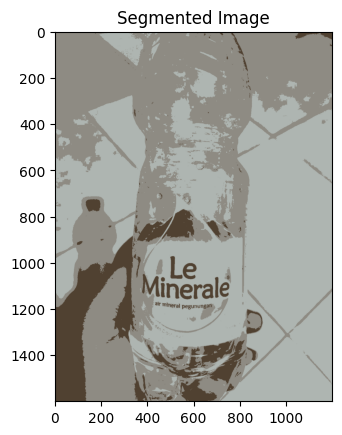

In [9]:
# Parameter K-Means
k = 3  # jumlah cluster
max_iter = 100  # jumlah iterasi maksimum

# K-Means algoritma
def initialize_centroids(pixel_values, k):
    np.random.seed(42)
    random_indices = np.random.choice(len(pixel_values), size=k, replace=False)
    centroids = pixel_values[random_indices]
    return centroids

def compute_distances(pixel_values, centroids):
    distances = np.linalg.norm(pixel_values[:, np.newaxis] - centroids, axis=2)
    return distances

def assign_clusters(distances):
    return np.argmin(distances, axis=1)

def compute_centroids(pixel_values, labels, k):
    centroids = np.zeros((k, pixel_values.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(pixel_values[labels == i], axis=0)
    return centroids

def kmeans(pixel_values, k, max_iter):
    centroids = initialize_centroids(pixel_values, k)
    for i in range(max_iter):
        distances = compute_distances(pixel_values, centroids)
        labels = assign_clusters(distances)
        new_centroids = compute_centroids(pixel_values, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Jalankan K-Means
centroids, labels = kmeans(pixel_values, k, max_iter)

# Ubah label menjadi gambar
segmented_image = centroids[labels].reshape(image.shape).astype(np.uint8)

# Tampilkan gambar hasil segmentasi
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()
